In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [59]:
from scipy.stats import zscore

In [2]:
custDemo=pd.read_csv('customer_demographics.csv')

In [3]:
custDemo.head()
custDemo.isnull().sum()

customer_id         0
age_range           0
marital_status    329
rented              0
family_size         0
no_of_children    538
income_bracket      0
dtype: int64

In [4]:
#Assuming married person wit family size 2 have no children in case of female
#Assuming Maratial_status is Single as they could be children and family size is greater than 1
custDemo['no_of_children'].fillna(0,inplace=True)
custDemo['marital_status'].fillna('Single',inplace=True)

In [42]:
custDemo['no_of_children'].replace('3+',3,inplace=True)
custDemo['family_size'].replace('5+',5,inplace=True)
custDemo['age_range'].replace({'70+':1,'56-70':2,'46-55':3,'36-45':4,'26-35':5,'18-25':6},inplace=True)
custDemo['marital_status'].replace({'Married':0,'Single':1},inplace=True)

In [49]:
custDemo.dtypes

customer_id       int64
age_range         int64
marital_status    int64
rented            int64
family_size       int32
no_of_children    int32
income_bracket    int64
dtype: object

In [48]:
custDemo['family_size']=custDemo['family_size'].astype('int')
custDemo['no_of_children']=custDemo['no_of_children'].astype(int)

In [51]:
custDemo.columns

Index(['customer_id', 'age_range', 'marital_status', 'rented', 'family_size',
       'no_of_children', 'income_bracket'],
      dtype='object')

In [55]:
custDemo.set_index('customer_id',inplace=True)

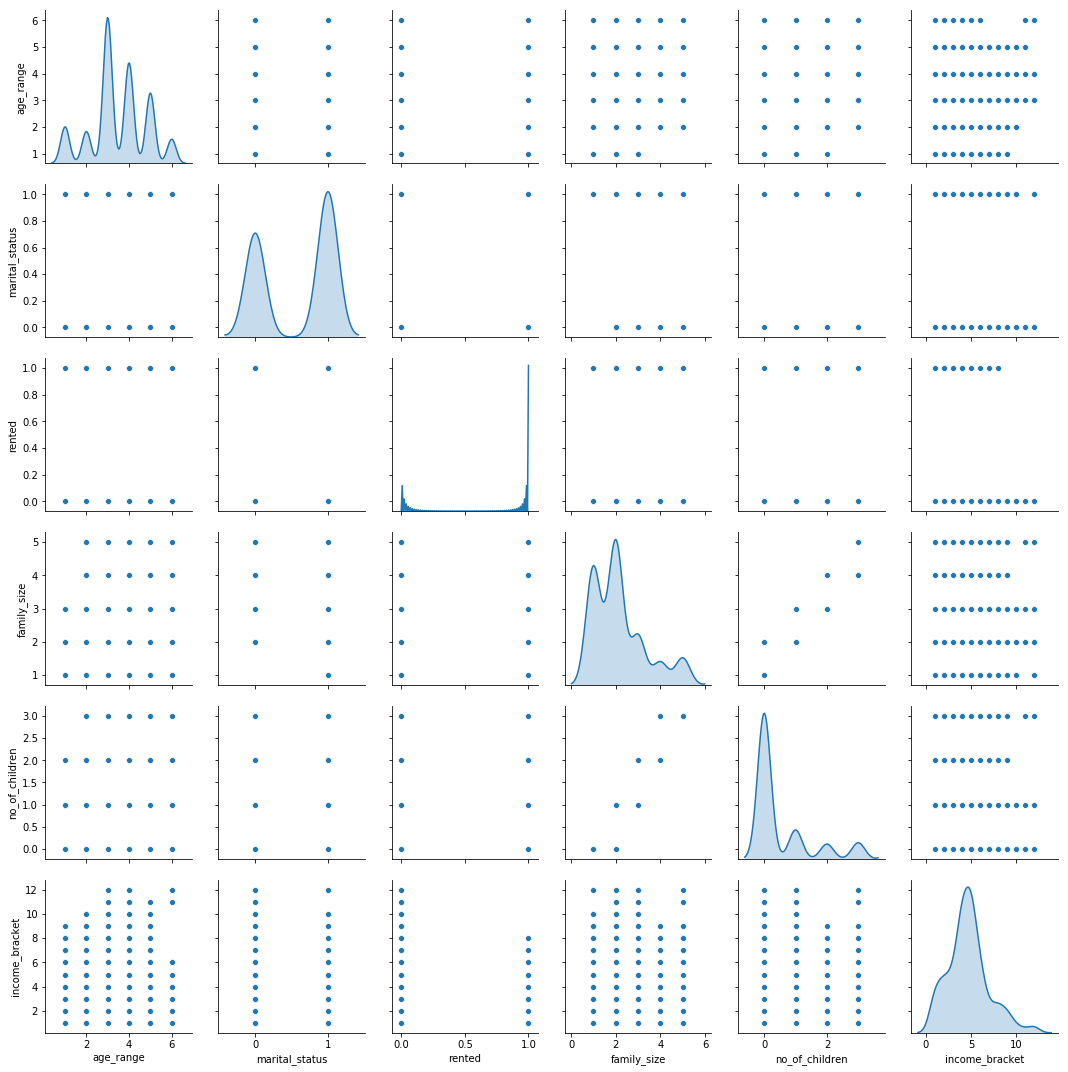

In [60]:
sns.pairplot(custDemo,diag_kind='kde')

In [61]:
custDemo_scaled=custDemo.apply(zscore)

In [62]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(custDemo_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,4560.000000
1,2,3291.710941
2,3,2639.619640
3,4,1969.019622
4,5,1689.839376
5,6,1471.632708
6,7,1347.926846
7,8,1204.532887
8,9,1124.725147
9,10,1047.536277


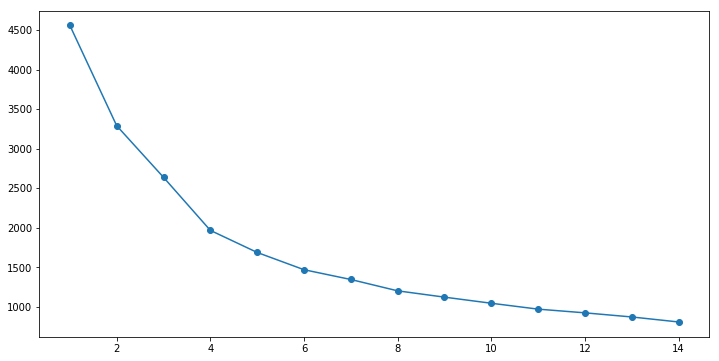

In [63]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [64]:
kmeans = KMeans(n_clusters=6, n_init = 15, random_state=2345)

In [65]:
kmeans.fit(custDemo_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=2345, tol=0.0001, verbose=0)

In [67]:
centroids = kmeans.cluster_centers_

In [68]:
centroids

array([[ 0.33481927,  0.84591703, -0.23879624, -0.59734122, -0.43793412,
        -0.31564787],
       [ 0.29051984, -0.63999276, -0.23879624,  1.97190918,  2.1812341 ,
         0.25310396],
       [-1.65162284, -0.17741906, -0.23879624, -0.35844663, -0.49177449,
        -0.2805175 ],
       [ 0.53570666,  0.00501159,  4.18767064,  0.29991882,  0.38178588,
        -0.51158391],
       [ 0.17282748, -1.18214903, -0.23879624,  0.17108967, -0.17245856,
        -0.05946369],
       [ 0.03059746, -0.13540526, -0.23879624, -0.22138783, -0.38757979,
         2.11226574]])

In [70]:
centroid_df = pd.DataFrame(centroids, columns = list(custDemo_scaled) )
centroid_df

,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,0.334819,0.845917,-0.238796,-0.597341,-0.437934,-0.315648
1,0.290520,-0.639993,-0.238796,1.971909,2.181234,0.253104
2,-1.651623,-0.177419,-0.238796,-0.358447,-0.491774,-0.280518
3,0.535707,0.005012,4.187671,0.299919,0.381786,-0.511584
4,0.172827,-1.182149,-0.238796,0.171090,-0.172459,-0.059464
5,0.030597,-0.135405,-0.238796,-0.221388,-0.387580,2.112266


In [78]:
custDemo['label']=kmeans.labels_

In [81]:
custDemo['label'].value_counts()

0    306
4    141
2    109
1    101
5     62
3     41
Name: label, dtype: int64

In [83]:
from mpl_toolkits.mplot3d import Axes3D

In [85]:
custDemo.reset_index(inplace=True)

In [87]:
custDemo.columns

Index(['customer_id', 'age_range', 'marital_status', 'rented', 'family_size',
       'no_of_children', 'income_bracket', 'label'],
      dtype='object')

In [89]:
custDemo.drop(columns=['age_range', 'marital_status', 'rented', 'family_size',
       'no_of_children', 'income_bracket'],inplace=True)

In [90]:
custDemo.to_csv('custDemo.csv')

In [92]:
custDemo.head()

,customer_id,label
0,1,2
1,6,4
2,7,0
3,8,1
4,10,0
